## Importing the neccessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Load the datasets of both files

### Read the tsv file

In [5]:
# Read tsv file

df_order = pd.read_csv("Order.tsv", sep='\t')
df_order

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship
0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4
1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4
2,AZ-2011-6674300,1-4-13,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4
3,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5
4,AZ-2011-617423,1-5-13,Daniel Burke,Echirolles,France,Central,Home Office,1-7-13,Priority,Auvergne-Rhône-Alpes,2
...,...,...,...,...,...,...,...,...,...,...,...
4112,AZ-2014-8174835,12-31-16,Eloise Sykes,Bielefeld,Germany,Central,Consumer,1-4-17,Economy,North Rhine-Westphalia,4
4113,AZ-2014-766953,12-31-16,Jose Gambino,Maidenhead,United Kingdom,North,Corporate,1-5-17,Economy,England,5
4114,AZ-2014-1412225,12-31-16,Leon Barnes,Worcester,United Kingdom,North,Consumer,1-1-17,Priority,England,1
4115,AZ-2014-7604524,12-31-16,Rebecca Chamberlain,Hamburg,Germany,Central,Home Office,1-4-17,Economy,Hamburg,4


### Read the json file

In [6]:
df_breakdown=pd.read_json("Order_breakdown.json")
df_breakdown.head()

,Order ID,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage


### See the both files column name and shape

In [7]:
df_breakdown.shape

(8047, 9)

In [8]:
df_breakdown.columns

Index(['Order ID', 'Product Name', 'Discount', 'Actual Discount', 'Sales',
       'Profit', 'Quantity', 'Category', 'Sub-Category'],
      dtype='object')

In [9]:
df_order.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'City', 'Country', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Days to Ship'],
      dtype='object')

## Merge the both datasets and make single CSV  dataset file

In [10]:
print("Shape of df_order:", df_order.shape)
print("Shape of df_breakdown:", df_breakdown.shape)


Shape of df_order: (4117, 11)
Shape of df_breakdown: (8047, 9)


In [11]:
common_order_ids = set(df_order['Order ID']) & set(df_breakdown['Order ID'])
print("Common Order IDs:", common_order_ids)


Common Order IDs: {'AZ-2012-9453588', 'AZ-2011-1335871', 'AZ-2014-8610318', 'AZ-2011-8091357', 'AZ-2013-4775573', 'AZ-2013-6224487', 'AZ-2014-8090092', 'AZ-2013-186027', 'AZ-2014-1466197', 'AZ-2014-3101518', 'BN-2013-7163306', 'BN-2012-7786585', 'BN-2011-5307099', 'AZ-2012-7281587', 'AZ-2014-6884762', 'AZ-2011-6186921', 'AZ-2011-1680940', 'AZ-2013-7146719', 'AZ-2011-8734686', 'AZ-2014-8630899', 'BN-2011-4249147', 'AZ-2014-1954439', 'AZ-2011-1546153', 'AZ-2014-8090546', 'AZ-2011-1279238', 'AZ-2014-1144428', 'BN-2012-704979', 'AZ-2013-308992', 'AZ-2013-5794364', 'AZ-2014-9284245', 'AZ-2013-7367497', 'AZ-2011-2270958', 'AZ-2014-4339601', 'BN-2011-4913858', 'BN-2011-5999704', 'AZ-2012-4005436', 'AZ-2012-6517579', 'BN-2013-1315378', 'BN-2013-2697575', 'AZ-2014-3040435', 'AZ-2014-81293', 'BN-2012-282607', 'BN-2012-9634659', 'AZ-2013-7994697', 'BN-2014-8933251', 'AZ-2014-3638648', 'AZ-2011-4827146', 'AZ-2013-7588631', 'AZ-2013-7322131', 'BN-2014-2113216', 'AZ-2013-5023304', 'AZ-2014-1240629',

In [12]:
# Merge the two DataFrames based on the common column 'Order ID' using an outer join
mart_df = pd.merge(df_order, df_breakdown, on='Order ID', how='outer')

# Print the shape of the merged DataFrame
print("Shape of merged DataFrame:", mart_df.shape)


Shape of merged DataFrame: (8047, 19)


## Save the Dataset in CSV file

In [13]:
mart_df.to_csv("Mart_df")

## Load the new dataset after merged both file

In [14]:
mart_df = pd.read_csv("Mart_df")
mart_df.head()

,Unnamed: 0,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,2,AZ-2011-6674300,1-4-13,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,3,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,4,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage


In [15]:
mart_df.shape

(8047, 20)

In [ ]:
--

In [16]:
mart_df.columns

Index(['Unnamed: 0', 'Order ID', 'Order Date', 'Customer Name', 'City',
       'Country', 'Region', 'Segment', 'Ship Date', 'Ship Mode', 'State',
       'Days to Ship', 'Product Name', 'Discount', 'Actual Discount', 'Sales',
       'Profit', 'Quantity', 'Category', 'Sub-Category'],
      dtype='object')

## Preprocessing Data

### Columns to drop

In [17]:
mart_df.drop(['Unnamed: 0','Country', 'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category'], axis=1, inplace=True)



In [18]:
mart_df.drop(['Discount'],axis=1,inplace=True)

In [19]:
mart_df.drop(['Order ID'],axis=1,inplace=True)

### Convert the 'Order Date' and 'Ship Date' columns to datetime

In [20]:

mart_df['Order Date'] = pd.to_datetime(mart_df['Order Date'])
mart_df['Ship Date'] = pd.to_datetime(mart_df['Ship Date'])

mart_df['Order Day of Week'] = mart_df['Order Date'].dt.dayofweek
mart_df['Order Day of Year'] = mart_df['Order Date'].dt.dayofyear
mart_df['Order Year'] = mart_df['Order Date'].dt.year

mart_df['Ship Day of Week'] = mart_df['Ship Date'].dt.dayofweek
mart_df['Ship Day of Year'] = mart_df['Ship Date'].dt.dayofyear
mart_df['Ship Year'] = mart_df['Ship Date'].dt.year


In [21]:
mart_df.drop(['Order Date', 'Ship Date'], axis=1, inplace=True)

In [22]:
mart_df.shape

(8047, 15)

In [23]:
mart_df.dtypes

Customer Name         object
City                  object
State                 object
Days to Ship           int64
Product Name          object
Actual Discount      float64
Sales                  int64
Profit                 int64
Quantity               int64
Order Day of Week      int64
Order Day of Year      int64
Order Year             int64
Ship Day of Week       int64
Ship Day of Year       int64
Ship Year              int64
dtype: object

In [24]:
mart_df.nunique()

Customer Name         792
City                  999
State                 127
Days to Ship            8
Product Name         1810
Actual Discount      1256
Sales                1248
Profit                845
Quantity               14
Order Day of Week       7
Order Day of Year     366
Order Year              4
Ship Day of Week        7
Ship Day of Year      366
Ship Year               5
dtype: int64

In [25]:
mart_df.nunique().sum()

7854

In [26]:
mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer Name      8047 non-null   object 
 1   City               8047 non-null   object 
 2   State              8047 non-null   object 
 3   Days to Ship       8047 non-null   int64  
 4   Product Name       8047 non-null   object 
 5   Actual Discount    8047 non-null   float64
 6   Sales              8047 non-null   int64  
 7   Profit             8047 non-null   int64  
 8   Quantity           8047 non-null   int64  
 9   Order Day of Week  8047 non-null   int64  
 10  Order Day of Year  8047 non-null   int64  
 11  Order Year         8047 non-null   int64  
 12  Ship Day of Week   8047 non-null   int64  
 13  Ship Day of Year   8047 non-null   int64  
 14  Ship Year          8047 non-null   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 943.1+ KB


## Scrubbing the Data

In [27]:
# Check to see if there are any missing values in our data set
mart_df.isnull().sum()

Customer Name        0
City                 0
State                0
Days to Ship         0
Product Name         0
Actual Discount      0
Sales                0
Profit               0
Quantity             0
Order Day of Week    0
Order Day of Year    0
Order Year           0
Ship Day of Week     0
Ship Day of Year     0
Ship Year            0
dtype: int64

## Exploratory data analysis: 

In [28]:
mart_df.describe()

,Days to Ship,Actual Discount,Sales,Profit,Quantity,Order Day of Week,Order Day of Year,Order Year,Ship Day of Week,Ship Day of Year,Ship Year
count,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000
mean,4.007332,29.793078,291.845657,35.198211,3.772089,3.281471,208.673667,2014.731080,2.932397,207.595750,2014.744998
std,1.741232,88.817656,485.212156,178.125844,2.203369,2.074293,101.951047,1.100474,1.915218,103.217229,1.106819
min,0.000000,0.000000,3.000000,-3060.000000,1.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,2013.000000
25%,3.000000,0.000000,48.000000,1.000000,2.000000,1.000000,134.000000,2014.000000,1.000000,130.000000,2014.000000
50%,4.000000,0.000000,117.000000,14.000000,3.000000,4.000000,224.000000,2015.000000,3.000000,225.000000,2015.000000
75%,5.000000,22.000000,313.000000,47.000000,5.000000,5.000000,297.000000,2016.000000,5.000000,292.000000,2016.000000
max,7.000000,1700.000000,6517.000000,2476.000000,14.000000,6.000000,366.000000,2016.000000,6.000000,366.000000,2017.000000


In [29]:
mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer Name      8047 non-null   object 
 1   City               8047 non-null   object 
 2   State              8047 non-null   object 
 3   Days to Ship       8047 non-null   int64  
 4   Product Name       8047 non-null   object 
 5   Actual Discount    8047 non-null   float64
 6   Sales              8047 non-null   int64  
 7   Profit             8047 non-null   int64  
 8   Quantity           8047 non-null   int64  
 9   Order Day of Week  8047 non-null   int64  
 10  Order Day of Year  8047 non-null   int64  
 11  Order Year         8047 non-null   int64  
 12  Ship Day of Week   8047 non-null   int64  
 13  Ship Day of Year   8047 non-null   int64  
 14  Ship Year          8047 non-null   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 943.1+ KB


In [30]:

# Calculate the correlation matrix
correlation_matrix = mart_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                   Days to Ship  Actual Discount     Sales    Profit  \
Days to Ship           1.000000        -0.019068 -0.004595  0.014128   
Actual Discount       -0.019068         1.000000  0.478904 -0.395875   
Sales                 -0.004595         0.478904  1.000000  0.441217   
Profit                 0.014128        -0.395875  0.441217  1.000000   
Quantity               0.001472         0.207153  0.353441  0.098670   
Order Day of Week      0.003833        -0.004913  0.009417  0.001703   
Order Day of Year      0.009478         0.004522 -0.001169  0.002124   
Order Year            -0.002149        -0.000227  0.003319 -0.008402   
Ship Day of Week       0.042672        -0.004065  0.007204  0.012681   
Ship Day of Year       0.004208         0.003917 -0.002774 -0.001574   
Ship Year              0.003485        -0.000165  0.003694 -0.007356   

                   Quantity  Order Day of Week  Order Day of Year  Order Year  \
Days to Ship       0.001472           0.003833        

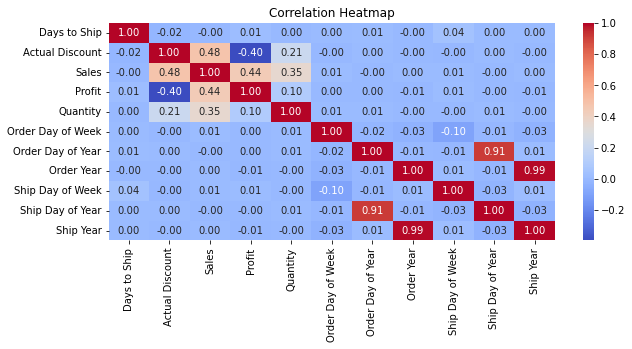

In [31]:

# Calculate the correlation matrix
correlation_matrix = mart_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


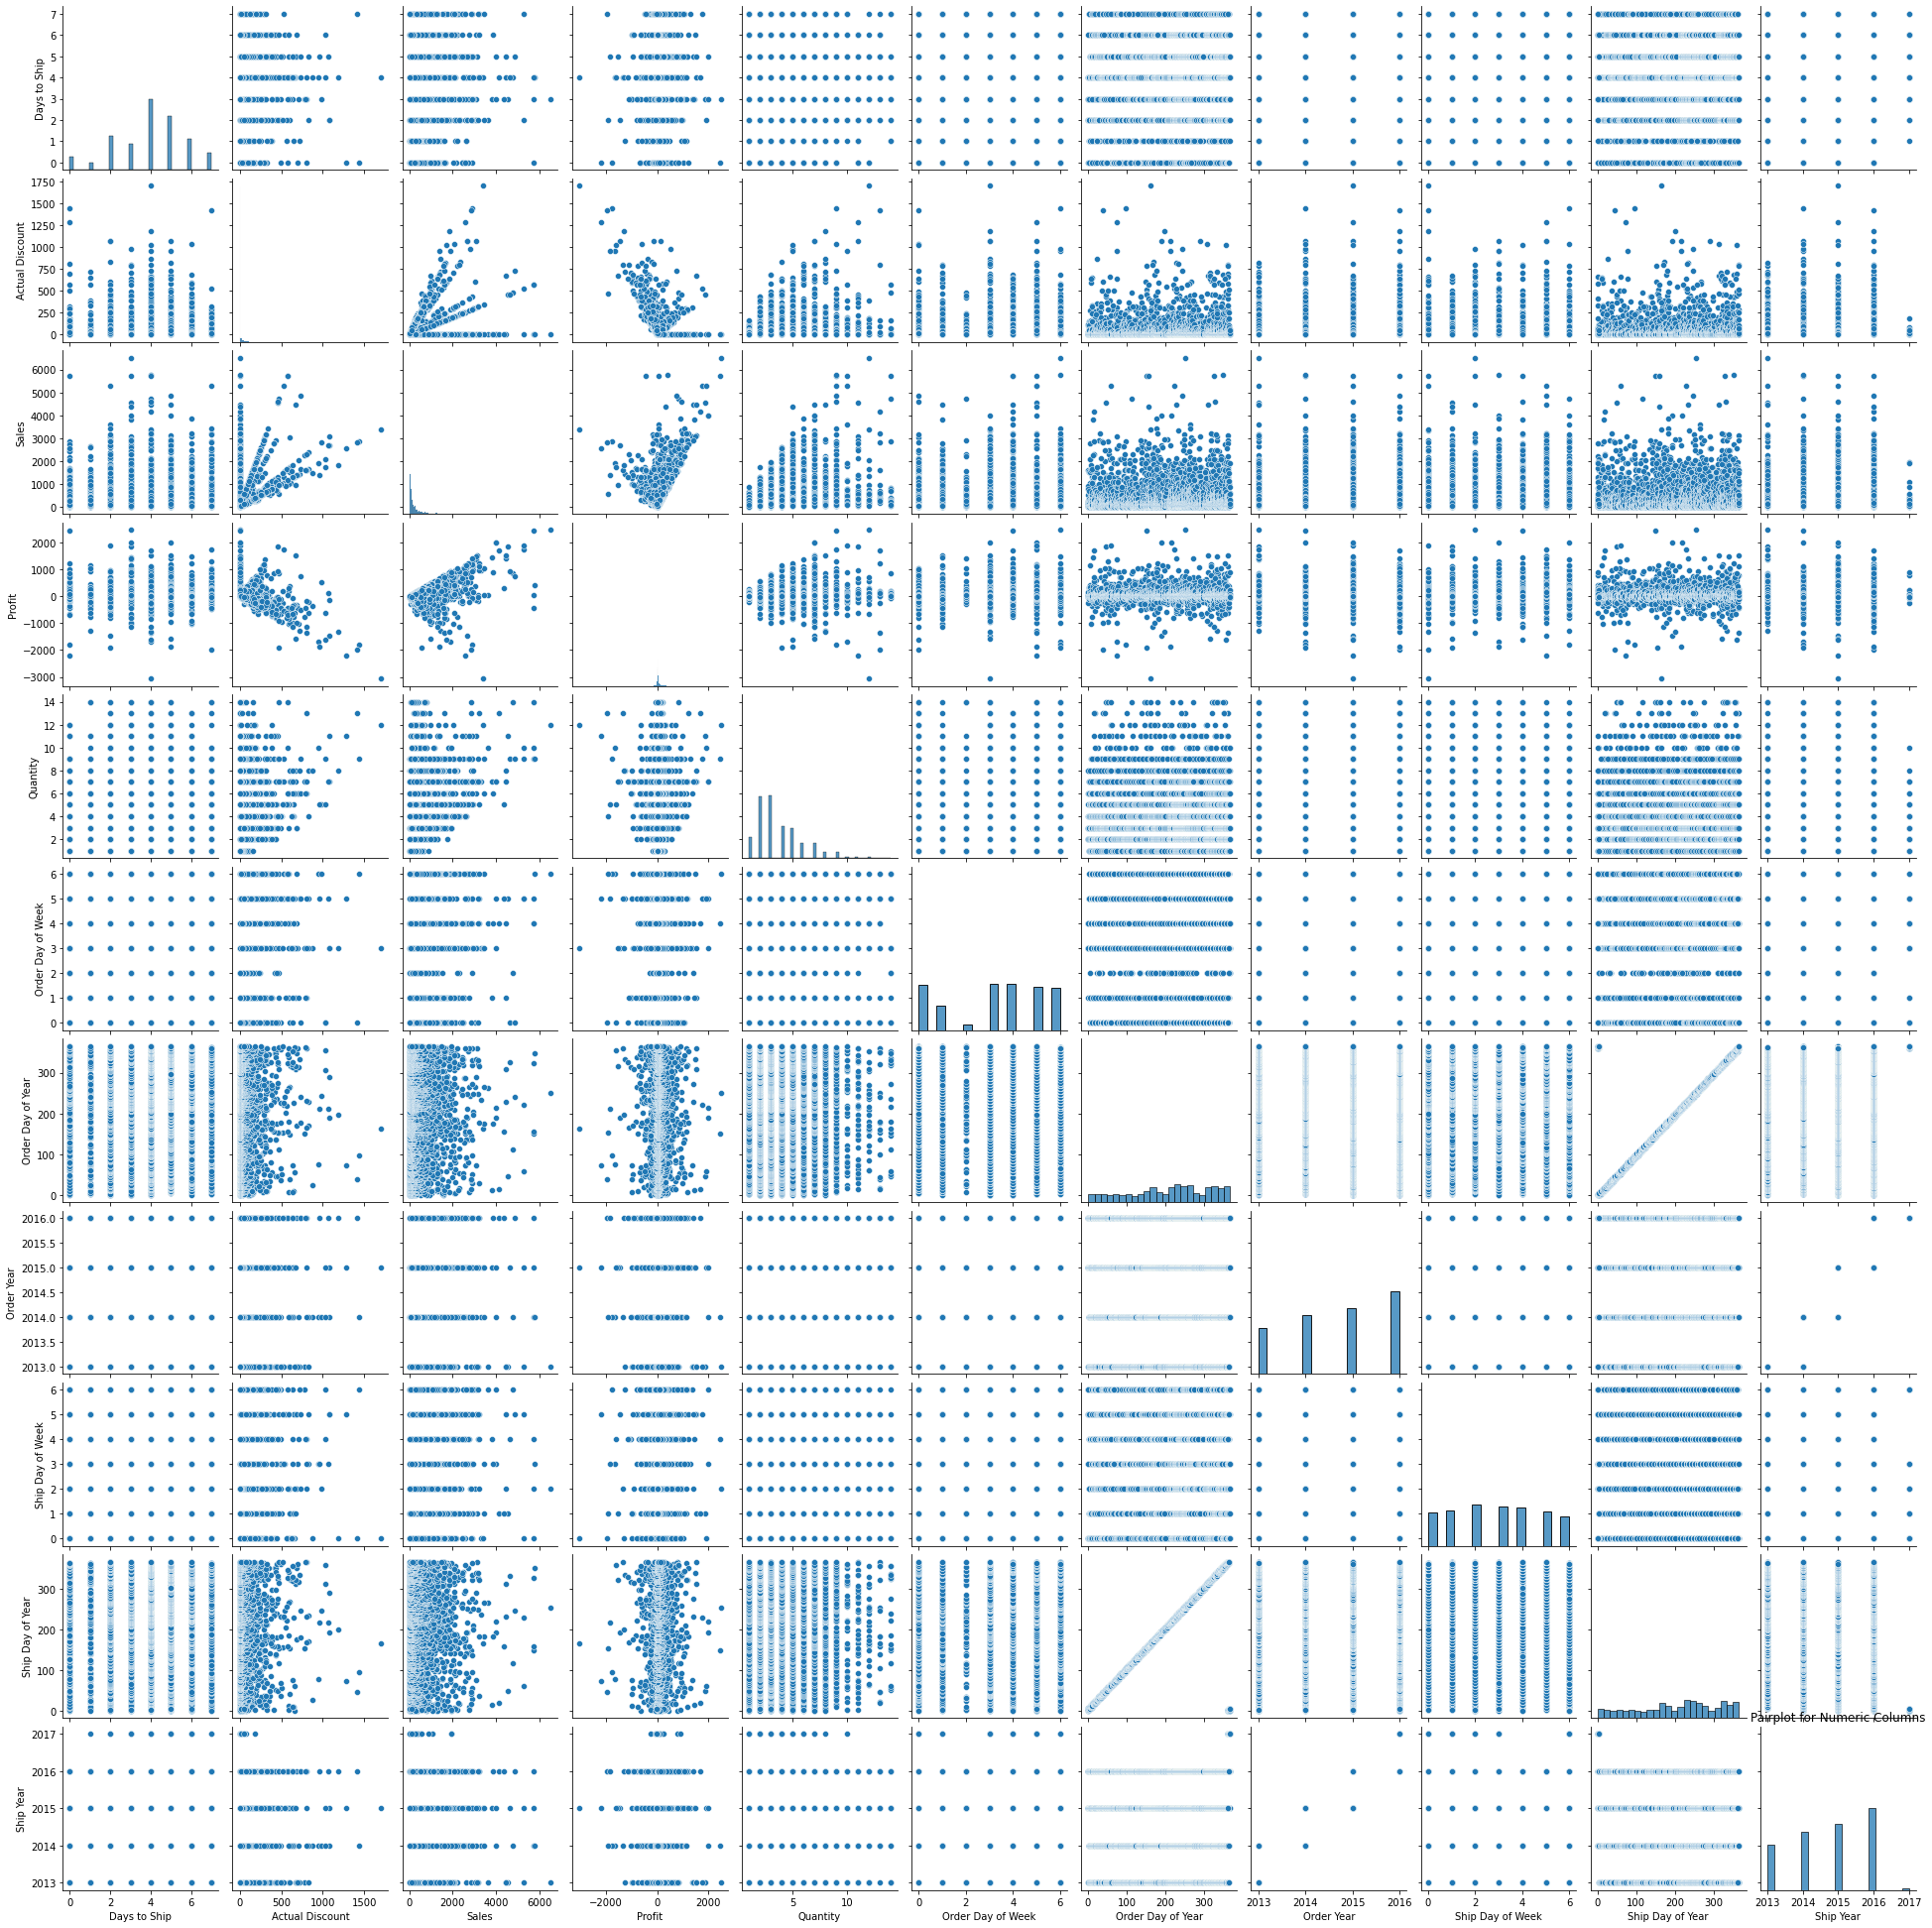

In [32]:

# Pairplot for numeric columns
sns.pairplot(mart_df)
plt.title('Pairplot for Numeric Columns')
plt.show()


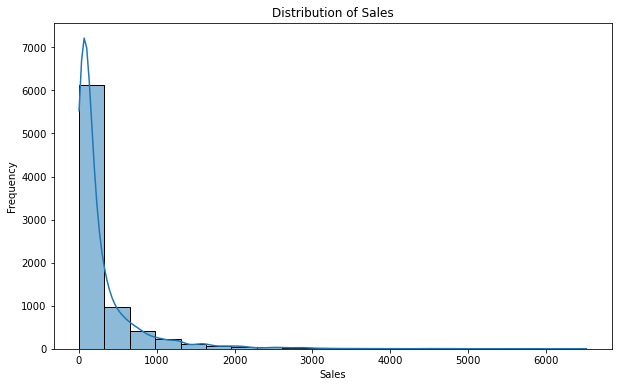

In [33]:

# Histogram: Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(mart_df['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


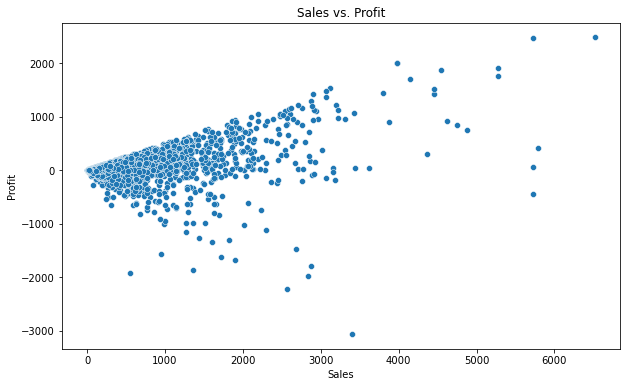

In [34]:

# Scatter Plot: Sales vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=mart_df)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


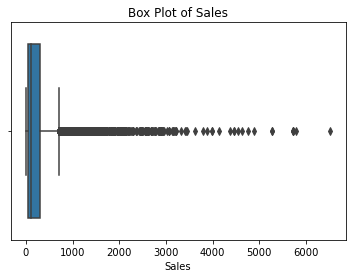

In [35]:

# Create a box plot of the 'Sales' column
sns.boxplot(data=mart_df, x='Sales')

# Add labels and title
plt.xlabel('Sales')
plt.title('Box Plot of Sales')

# Show the plot
plt.show()


# Modeling the Data

### Selecting the Dependent and Independent Features

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [37]:
# Define the features (X) and target variable (y)
X = mart_df.drop(columns=['Sales'])  # Exclude the 'Sales' column
y = mart_df['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check the shape of the resulting DataFrames
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (6437, 14)
X_test shape: (1610, 14)
y_train shape: (6437,)
y_test shape: (1610,)


## Creating function to evaluate the Regression Evaluation Metrics

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function for Regression Evaluation Metrics

test = {'Model' : [], 'MAE' : [], 'MSE' : [], 'R2Score' : []}
def eval_model(model_name, y, ypred) :
    mae = mean_absolute_error(y, ypred)
    mse = mean_squared_error(y, ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, ypred)
    print('Mean Absolute Error', mae)
    print('Mean Squared Error', mse)
    print('Root Mean Squared Error', rmse)
    print('R2 Score', r2)
    test['Model'].append(model_name)
    test['MAE'].append(mae)
    test['MSE'].append(mse)
    test['R2Score'].append(r2)

In [39]:
mart_df.dtypes

Customer Name         object
City                  object
State                 object
Days to Ship           int64
Product Name          object
Actual Discount      float64
Sales                  int64
Profit                 int64
Quantity               int64
Order Day of Week      int64
Order Day of Year      int64
Order Year             int64
Ship Day of Week       int64
Ship Day of Year       int64
Ship Year              int64
dtype: object

## Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder

### Import the neccessary sklearn transformational Libraries

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [57]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [ 'Customer Name', 'City', 'State', 'Product Name'])],
                         remainder='passthrough')
Model = RandomForestRegressor()
pipe_lr = Pipeline([('CT', CT), ('Model', Model)])
pipe_lr.fit(X_train, y_train)

ypred_lr = pipe_lr.predict(X_test)

eval_model('RandomForestRegressor', y_test, ypred_lr)

Mean Absolute Error 111.95669661346682
Mean Squared Error 41492.16211353245
Root Mean Squared Error 203.69624963050364
R2 Score 0.7786764569860195


## Extra Trees Regressor

In [62]:
from sklearn.ensemble import ExtraTreesRegressor

In [61]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [ 'Customer Name', 'City', 'State', 'Product Name'])],
                         remainder='passthrough')
Model =  ExtraTreesRegressor(n_estimators=100, max_depth=8, min_samples_split=11, random_state=5)
pipe_lr = Pipeline([('CT', CT), ('Model', Model)])
pipe_lr.fit(X_train, y_train)

ypred_lr = pipe_lr.predict(X_test)

eval_model('Extra Trees Regressor', y_test, ypred_lr)

Mean Absolute Error 123.22835525282018
Mean Squared Error 44216.3061192962
Root Mean Squared Error 210.27673699031996
R2 Score 0.7641455872428087


## Gradient Boosting Regressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), [ 'Customer Name', 'City', 'State', 'Product Name'])],
                         remainder='passthrough')
Model =  GradientBoostingRegressor(n_estimators=100, max_depth=8, min_samples_split=11, random_state=5)
pipe_lr = Pipeline([('CT', CT), ('Model', Model)])
pipe_lr.fit(X_train, y_train)

ypred_lr = pipe_lr.predict(X_test)

eval_model('Extra Trees Regressor', y_test, ypred_lr)

Mean Absolute Error 98.91297076911768
Mean Squared Error 36968.6755244736
Root Mean Squared Error 192.27239927892302
R2 Score 0.8028052087229701


In [58]:
import pickle

In [59]:
import pickle

with open(r'pipe_lr.pkl', 'wb') as file:
    pickle.dump(pipe_lr, file)

## load the model 

In [67]:
loaded_model = pickle.load(open('pipe_lr.pkl', 'rb'))  

## Performing the model on 20 randomly selected data points

In [68]:
random_sample =mart_df.sample(20)
random_sample.head()

,Customer Name,City,State,Days to Ship,Product Name,Actual Discount,Sales,Profit,Quantity,Order Day of Week,Order Day of Year,Order Year,Ship Day of Week,Ship Day of Year,Ship Year
5618,Carl Proctor,Lanester,Brittany,6,"Hamilton Beach Toaster, Silver",15.7,157,59,3,3,35,2016,2,41,2016
1276,Leroy Samson,Grenoble,Auvergne-Rhône-Alpes,5,"Rogers Box, Wire Frame",4.1,41,1,2,1,337,2013,6,342,2013
1956,Julie Ochoa,Soissons,Nord-Pas-de-Calais-Picardie,5,"Rubbermaid Frame, Duo Pack",0.0,220,24,2,6,145,2014,4,150,2014
7873,Ava Giles,Pontault-Combault,Ile-de-France,5,"Ames Clasp Envelope, Set of 50",0.0,36,16,5,4,351,2016,2,356,2016
3669,Aidan Rowe,Saint-Chamond,Auvergne-Rhône-Alpes,0,"Fellowes Lockers, Industrial",74.8,748,283,4,4,79,2015,4,79,2015


In [69]:
mart_sample =random_sample.to_csv("mart_df_sample_data")
random_sample.shape

(20, 15)

In [70]:
new_x = random_sample.drop('Sales', axis=1)
new_ytest = random_sample['Sales']
print(new_x.shape)


(20, 14)


In [71]:
import numpy as np

In [72]:

best_pred =loaded_model.predict(new_x)
print(eval_model('Best Model', new_ytest, best_pred))
best_pred

Mean Absolute Error 73.60784550355928
Mean Squared Error 7003.387869822123
Root Mean Squared Error 83.68624659896108
R2 Score 0.8596145503309565
None


array([228.88833257,  79.5511993 ,  84.10481221,  84.38020391,
       816.87956016, 630.01024879,  86.11391862, 168.05817505,
        79.5511993 , 310.73369503,  79.5511993 ,  79.5511993 ,
        83.30229738, 315.18812718, 126.77739103,  79.5511993 ,
        80.88115226, 711.02011474,  79.5511993 ,  79.5511993 ])